### Project 6-Mecial Cost
#### By: Sandra Ruiz
#### April 14,2025

#### Introduction: For this project we will work with regression and different models examing csv data to predict medical cost/charges.

### Section 1. Import and Inspect the Data
1.1 Load the dataset and display the first 10 rows.

1.2 Check for missing values and display summary statistics.


In [7]:
import pandas as pd
import os

# Read the CSV file
df = pd.read_csv("C:/Users/19564/Downloads/archive (2)/insurance.csv")

df.to_csv("medical.csv", index=False)
print("Saved as medical.csv")

# First 10 rows
display(df.head(10))


# Shape
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


# Missing values
print("🔹 Missing values:\n", df.isnull().sum())

# Summary statistics
print("\n🔹 Summary statistics:")
display(df.describe())


Saved as medical.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Number of rows: 1338
Number of columns: 7
🔹 Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

🔹 Summary statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Reflection 1: What do you notice about the dataset? Are there any data issues?

No issues, no missing values. There are 7 coumns and 1338 rows of information with whole numbers

### Section 2. Data Exploration and Preparation

#### 2.1 Explore data patterns and distributions
Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

#### 2.2 Handle missing values and clean data
Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable).

#### 2.3 Feature selection and engineering
Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).

#### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

In [ ]:
#### 2.1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV (or use your sample data if loading from a DataFrame directly)
df = pd.read_csv("medical.csv")

# Display basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


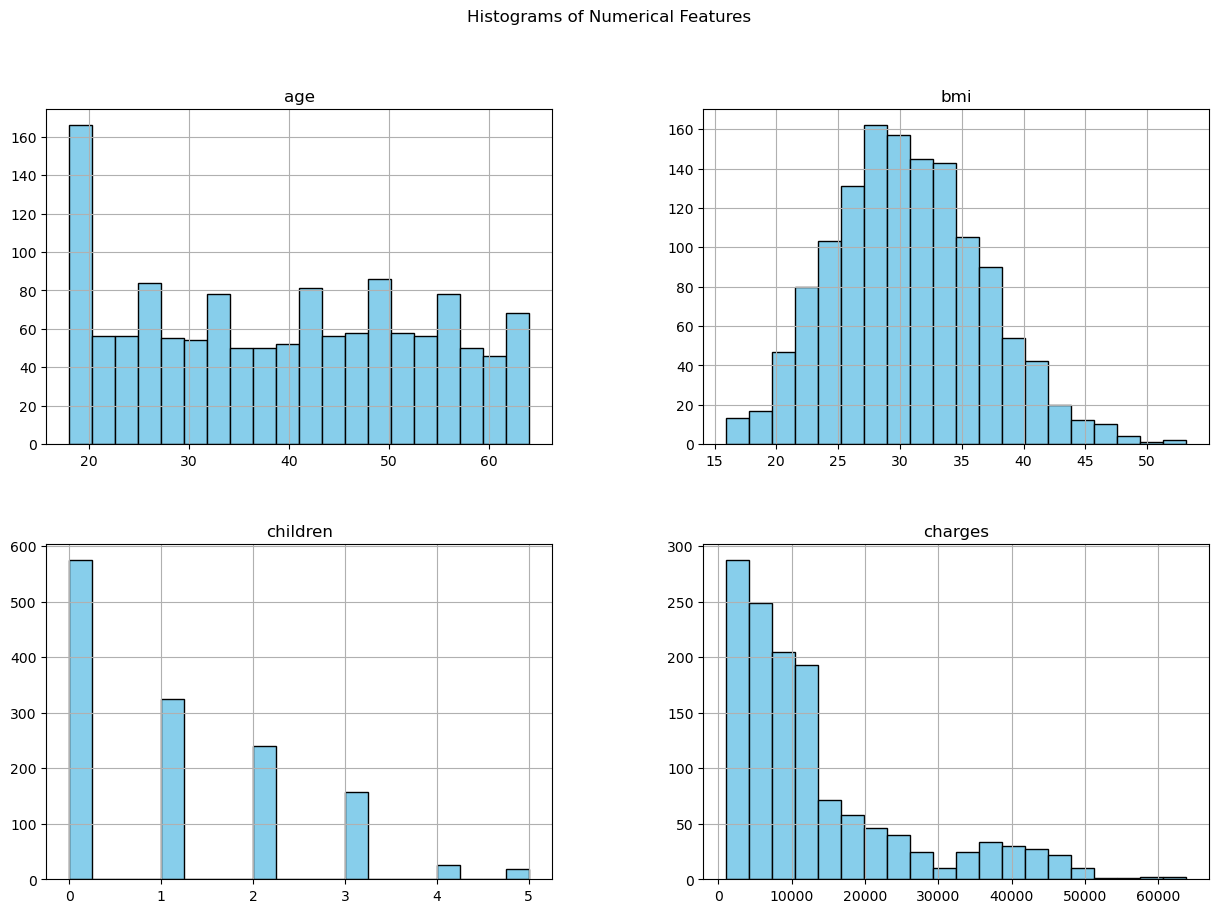

In [2]:
# Plot histograms
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()


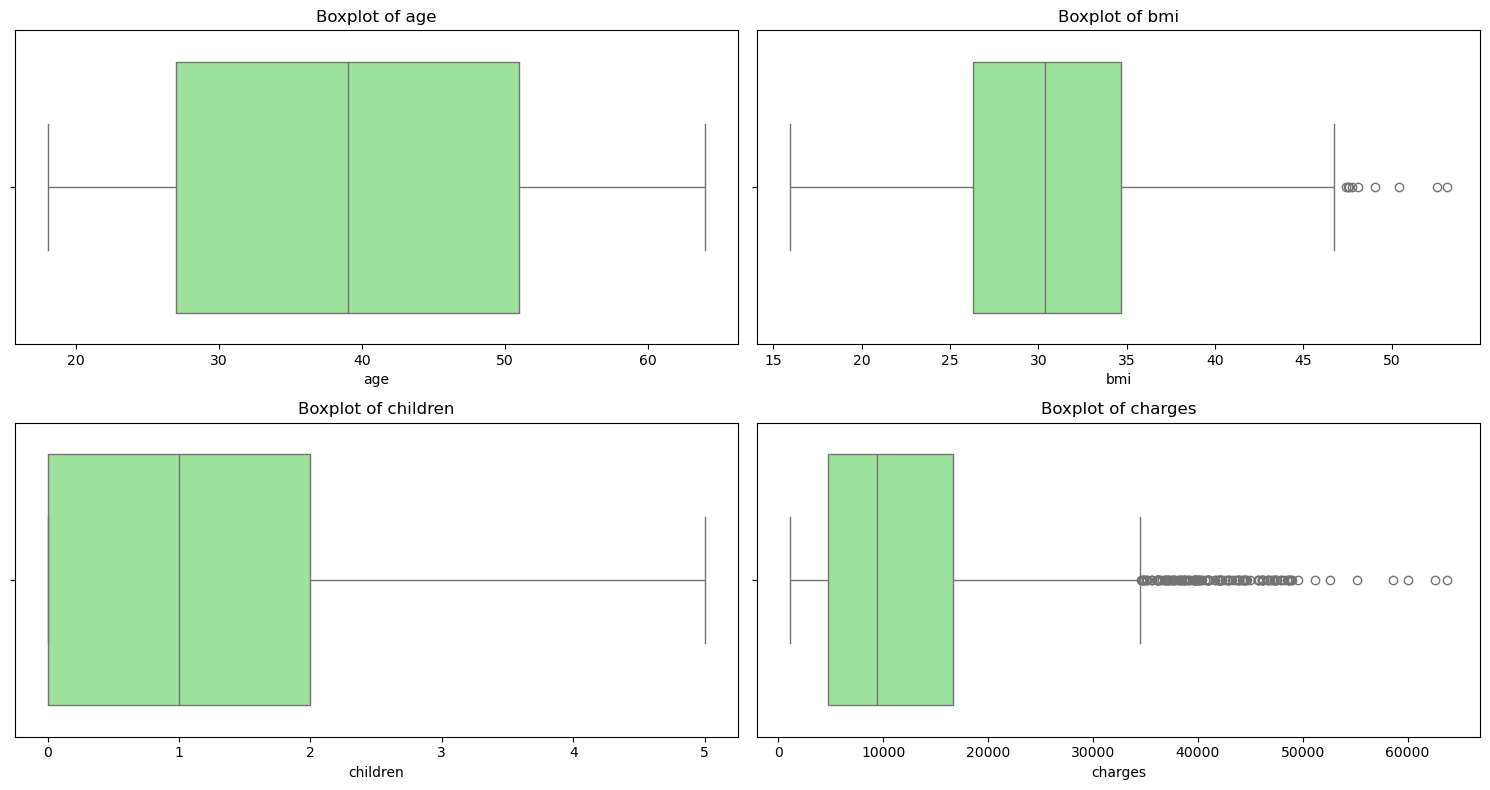

In [3]:
numerical = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


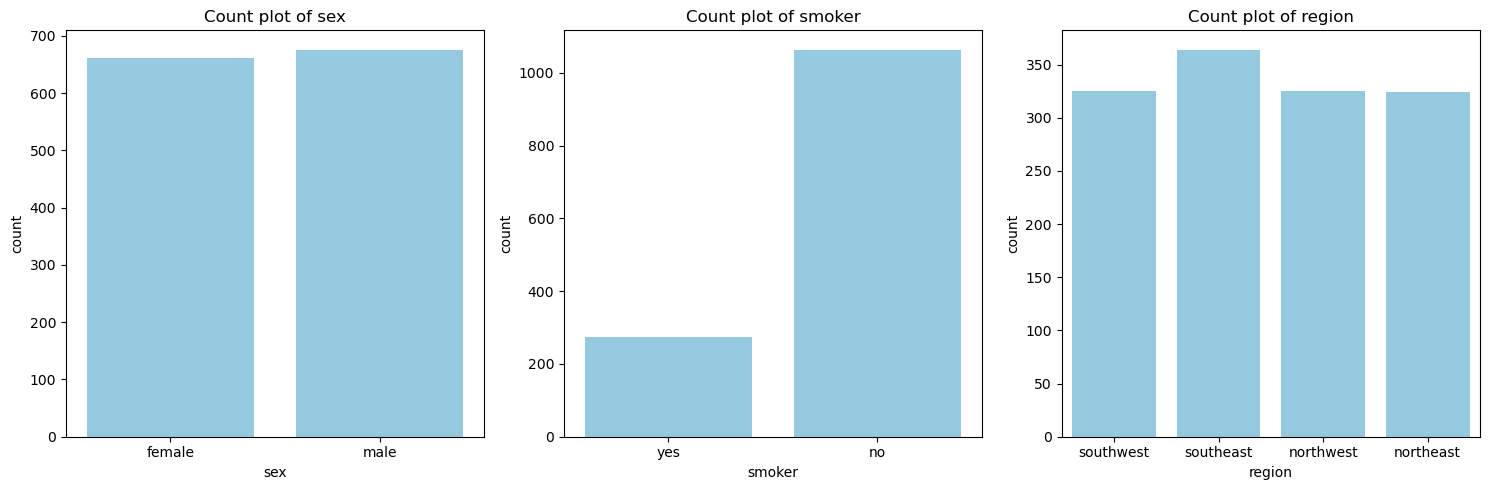

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical = ['sex', 'smoker', 'region']
plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, color='skyblue')  # Use 'color' instead of 'palette'
    plt.title(f'Count plot of {col}')

plt.tight_layout()
plt.show()



In [6]:
smoker_counts = df['smoker'].value_counts(normalize=True)
print("Smoker value proportions:\n", smoker_counts)


Smoker value proportions:
 smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64


In [ ]:
#### 2.2
print("Missing values:\n", df.isnull().sum())
# If missing values exist, you can drop or impute them
# df.dropna(inplace=True)  # OR use imputation as needed


Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# For example, remove extreme charges (if needed)
q_low = df["charges"].quantile(0.01)
q_hi  = df["charges"].quantile(0.99)
df_clean = df[(df["charges"] > q_low) & (df["charges"] < q_hi)]


In [9]:
# Use one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [10]:
#### 2.3
# Example: BMI category
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'children', 'charges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()


,age,sex,bmi,children,smoker,region,charges,bmi_category
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584,Overweight
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689,Obese
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675,Obese
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843,Normal
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802,Overweight


##### Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

There are no missing values, 20% fo the people are smokers. There are many that fall into the obese category. The extreme 1% values were removed to reduce outliers for the regression model.
The Standardization of numerical features like age, bmi, children, charges were important to ensure that they are on a similar scale.A new feature was created,bmi_category, by binning BMI into four categories: Underweight, Normal, Overweight, and Obese. These steps will improve model accuracy and stability. Standardization prevents features with large scales from taking over the model.



#### Section 3. Feature Selection and Justification
3.1 Choose features and target

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.
Justify your selection with reasoning.

Features: age, bmi, children, smoker (categorical: yes/no), region (categorical: northeast, northwest, southeast, southwest)

Target Variable: charges

Justification:
The age, bmi, and children can all have direct or indirect effects on medical costs.
Smoker is highly likely to influence medical charges due to health risks.
The region may impact costs due to regional healthcare pricing differences or access to care.

3.2 Define X and y

Assign input features to X
Assign target variable to y (as applicable)



In [1]:
#### 3.2

import pandas as pd

# Load the dataset
df = pd.read_csv('medical.csv')

# Define input features (X) and target variable (y)
X = df[['age', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']


#### Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

All features selected may have an impact on charges, example age for which people are older are known to have more medical complications, the same for those that are smokers.




### Section 4. Train a Model (Linear Regression)

4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
4.2 Train model using Scikit-Learn model.fit() method
4.3 Evalulate performance, for example:
Regression: R^2, MAE, RMSE (RMSE has been recently updated)
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
Clustering: Inertia, Silhouette Score

In [6]:
#### 4.1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv('medical.csv')

# Remove extreme charges (optional step, like you did earlier)
q_low = df["charges"].quantile(0.01)
q_hi  = df["charges"].quantile(0.99)
df = df[(df["charges"] > q_low) & (df["charges"] < q_hi)]

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 4.2

from sklearn.linear_model import LinearRegression

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#### 4.3

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate using regression metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



R² Score: 0.7610
Mean Absolute Error (MAE): 3840.30
Root Mean Squared Error (RMSE): 5603.19


#### Reflection 4: How well did the model perform? Any surprises in the results?

The Linear Regression model achieved an R² score of 0.7610, meaining about 76% of the variance in medical charges. This is a good indicator for predicting medical costs based on the selected features.
The (MAE) is about $3,840, which indicates the model's predictions are off by that amount on avg.
The Root Mean Squared Error is about $5,603, meaning the larger errors more heavily penalized than the MAE.
No surpsies as the the model performed well as smoker status, age, and BMI are known to influence medical costs. The somewhat high RMSE also poionts to that the Linear Regression might not capture all complexities in the data. 

### Section 5. Improve the Model or Try Alternates (Implement Pipelines)
5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

5.3 Compare performance of all models across the same performance metrics

Reflection 5: Which models performed better? How does scaling impact results?

In [ ]:
#### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Split features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split again (optional if done before)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical feature columns
num_features = X.columns

# Pipeline 1
pipeline1 = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Fit and predict
pipeline1.fit(X_train, y_train)
y_pred1 = pipeline1.predict(X_test)


In [8]:
#### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

from sklearn.preprocessing import PolynomialFeatures

# Pipeline 2
pipeline2 = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Fit and predict
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)


In [9]:
#### 5.3 Compare performance of all models across the same performance metrics

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Function to evaluate and print performance
def evaluate_model(y_test, y_pred, label):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{label} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MAE: ${mae:.2f}")
    print(f"  RMSE: ${rmse:.2f}")
    print("-" * 35)

evaluate_model(y_test, y_pred1, "Pipeline 1 (Linear Regression)")
evaluate_model(y_test, y_pred2, "Pipeline 2 (Polynomial Regression)")


Pipeline 1 (Linear Regression) Results:
  R² Score: 0.7610
  MAE: $3840.30
  RMSE: $5603.19
-----------------------------------
Pipeline 2 (Polynomial Regression) Results:
  R² Score: 0.8224
  MAE: $2912.50
  RMSE: $4830.35
-----------------------------------


#### Reflection 5: 
Which models performed better?How does scaling impact results?

The second model, Pipeline 2 (Polynomial Regression), performed the best overall. It had a higher R² score of 0.8224 compared to 0.7610 in Pipeline 1, which means it was better at predicting the medical charges. It also had a lower Mean Absolute Error (MAE) of $2,912.50 and a lower Root Mean Squared Error (RMSE) of $4,830.35, while Pipeline 1 had an MAE of $3,840.30 and an RMSE of $5,603.19. The second model worked better because it found patterns, like squaring or cubing the features. This helped it make smarter guesses, but it might not be as reliable if the data is smaller. Scaling was also really important in both models because it made sure that all the numbers—like age, BMI, and children—were on the same level. Without scaling, the bigger numbers could have too much influence and hurt the model’s performance, especially in the polynomial model where numbers get even bigger.

### Section 6. Final Thoughts & Insights
6.1 Summarize findings.

Throughout this project the insurance dataset was analyzed to explore how different factors such as age, sex, BMI, number of children, smoking status, and region influence insurance charges. The feature of Smoking status had the most significant impact on charges,with smokers paying considerably more. Also, BMI and age were positively correlated with higher charges.The region and sex had minimal impact on charges in comparison to other features.

6.2 Discuss challenges faced.

 Processing and cleaning the data, and visualizing relationships among multiple variables.

6.3 If you had more time, what would you try next?

I would try other machine learning models such as random forest to help  predict insurance charges more accurately. I would look into subgroup analyses, such as looking at charges across different age brackets and regions.

Reflection 6: What did you learn from this project?

This project helped me to do analysis form start to finish, from cleaning and exploring data, to interpert and present results visually. To try different models and interpret and analyze results. I learned how certian features such as smoking and BMI are in influencing insurance charges the most. 
